## Plotting loss comparison

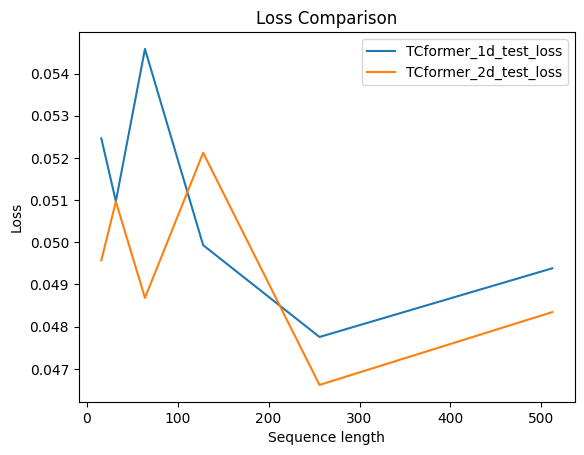

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
# read from npy file
base_dir="/mnt/c/WorkDir/ComputerScience/MachineLearning/EE/src/experiments/loss-data/exchange_rate"

df=pd.DataFrame()
# iterate the directory and read npy file
for filename in os.listdir(base_dir):
    if filename.endswith(".npy"):
        if filename.__contains__("test") and not filename.__contains__("transformer"):
            filepath=os.path.join(base_dir, filename)
            data=np.load(filepath)
            df[f"{filename[:-8]}"]=data
        
df['sequence_length']=np.array([16,32,64,128,256,512])
df = df.rename(columns={'hybrid_transformer1d_test_loss': 'TCformer_1d_test_loss'})

for column in df.columns:
    if column != "sequence_length":
        plt.plot(df['sequence_length'], df[column], label=column)

plt.legend()

plt.title('Loss Comparison')
plt.xlabel('Sequence length')
plt.ylabel('Loss')

plt.show()

In [26]:
df

,hybrid_transformer2d_test_loss,TCformer_1d_test_loss,transformer_test_loss,sequence_length
0,0.049004,0.052463,0.192051,16
1,0.049241,0.050972,0.193239,32
2,0.049376,0.054585,0.191550,64
3,0.047336,0.049932,0.187871,128
4,0.046694,0.047755,0.185520,256
5,0.048758,0.049383,0.189200,512


In [27]:
df['pct_improve'] = ((df['TCformer_1d_test_loss'] / df['transformer_test_loss']) * 100).round(2)

In [28]:
df

,hybrid_transformer2d_test_loss,TCformer_1d_test_loss,transformer_test_loss,sequence_length,pct_improve
0,0.049004,0.052463,0.192051,16,27.32
1,0.049241,0.050972,0.193239,32,26.38
2,0.049376,0.054585,0.191550,64,28.50
3,0.047336,0.049932,0.187871,128,26.58
4,0.046694,0.047755,0.185520,256,25.74
5,0.048758,0.049383,0.189200,512,26.10


In [29]:
df.to_latex(index=False)

/tmp/ipykernel_32986/3912603319.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(index=False)


'\\begin{tabular}{rrrrr}\n\\toprule\n hybrid\\_transformer2d\\_test\\_loss &  TCformer\\_1d\\_test\\_loss &  transformer\\_test\\_loss &  sequence\\_length &  pct\\_improve \\\\\n\\midrule\n                       0.049004 &               0.052463 &               0.192051 &               16 &        27.32 \\\\\n                       0.049241 &               0.050972 &               0.193239 &               32 &        26.38 \\\\\n                       0.049376 &               0.054585 &               0.191550 &               64 &        28.50 \\\\\n                       0.047336 &               0.049932 &               0.187871 &              128 &        26.58 \\\\\n                       0.046694 &               0.047755 &               0.185520 &              256 &        25.74 \\\\\n                       0.048758 &               0.049383 &               0.189200 &              512 &        26.10 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [30]:
pd.read_csv("../data/stock-data/AMD.csv")

,Date,Open,High,Low,Close,Adj Close,Volume
0,1981-01-02,0.000000,6.041667,5.750000,5.875000,5.875000,558000
1,1981-01-05,0.000000,5.979167,5.437500,5.437500,5.437500,477000
2,1981-01-06,0.000000,5.458333,5.062500,5.312500,5.312500,1014000
3,1981-01-07,0.000000,5.208333,4.708333,5.187500,5.187500,1091400
4,1981-01-08,0.000000,5.166667,4.854167,4.937500,4.937500,621000
...,...,...,...,...,...,...,...
10991,2024-08-08,131.970001,136.479996,128.940002,136.320007,136.320007,49037500
10992,2024-08-09,134.690002,135.500000,132.440002,134.270004,134.270004,40583000
10993,2024-08-12,134.440002,137.990005,133.229996,136.770004,136.770004,39724300
10994,2024-08-13,138.119995,141.190002,137.520004,141.130005,141.130005,42183600


## Plotting traffic data

In [3]:
base_dir="/mnt/c/WorkDir/ComputerScience/MachineLearning/EE/src"
file_path = base_dir+"/data/iTransformer_datasets/traffic/traffic.csv"
traffic_df=pd.read_csv(file_path)
traffic_df

,date,0,1,2,3,4,5,6,7,8,...,852,853,854,855,856,857,858,859,860,OT
0,2016-07-01 02:00:00,0.0048,0.0146,0.0289,0.0142,0.0064,0.0232,0.0162,0.0242,0.0341,...,0.0051,0.0051,0.0074,0.0079,0.0051,0.0051,0.0339,0.0051,0.0100,0.0121
1,2016-07-01 03:00:00,0.0072,0.0148,0.0350,0.0174,0.0084,0.0240,0.0201,0.0338,0.0434,...,0.0036,0.0036,0.0107,0.0058,0.0036,0.0036,0.0348,0.0036,0.0087,0.0136
2,2016-07-01 04:00:00,0.0040,0.0101,0.0267,0.0124,0.0049,0.0170,0.0127,0.0255,0.0332,...,0.0030,0.0030,0.0043,0.0050,0.0030,0.0030,0.0327,0.0030,0.0061,0.0107
3,2016-07-01 05:00:00,0.0039,0.0060,0.0218,0.0090,0.0029,0.0118,0.0088,0.0163,0.0211,...,0.0033,0.0033,0.0019,0.0052,0.0033,0.0033,0.0292,0.0033,0.0040,0.0071
4,2016-07-01 06:00:00,0.0042,0.0055,0.0191,0.0082,0.0024,0.0095,0.0064,0.0087,0.0144,...,0.0049,0.0049,0.0011,0.0071,0.0049,0.0049,0.0264,0.0049,0.0040,0.0039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,0.0342,0.0332,0.1378,0.0559,0.0165,0.0386,0.0457,0.0687,0.0716,...,0.0139,0.0179,0.0278,0.0280,0.0227,0.0375,0.0142,0.0201,0.0341,0.0429
17540,2018-07-01 22:00:00,0.0285,0.0253,0.0542,0.0485,0.0131,0.0331,0.0372,0.0569,0.0669,...,0.0116,0.0155,0.0201,0.0267,0.0207,0.0320,0.0122,0.0163,0.0306,0.0363
17541,2018-07-01 23:00:00,0.0276,0.0257,0.0551,0.0474,0.0121,0.0326,0.0381,0.0566,0.0675,...,0.0109,0.0142,0.0208,0.0252,0.0189,0.0287,0.0123,0.0152,0.0292,0.0325
17542,2018-07-02 00:00:00,0.0232,0.0229,0.0496,0.0435,0.0119,0.0297,0.0361,0.0517,0.0598,...,0.0092,0.0124,0.0219,0.0215,0.0169,0.0258,0.0096,0.0130,0.0252,0.0279


## TCformer 1d

In [9]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpmath import floor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, IterableDataset
import torch
from tqdm import tqdm
from Transformer.Encoder import Encoder
import torch.nn as nn
import torch.nn.functional as F


def load_data(filepath, category):
    data = pd.read_csv(filepath)
    if 'date' in data.columns:
        data.drop(['date'], axis=1, inplace=True)
    if 'Date' in data.columns:
        data.drop(['Date'], axis=1, inplace=True)
    if 'Adj Close' in data.columns:
        data.drop(['Adj Close'], axis=1, inplace=True)
    if 'Code' in data.columns:
        data.drop(['Code'], axis=1, inplace=True)
    if 'Time' in data.columns:
        data.drop(['Time'], axis=1, inplace=True)
    return data.dropna()


def scale_data(data):
    data = data.copy()
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    return data


def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length, :]
        label = data[i + seq_length, :]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


class TimeSeriesDataset(IterableDataset):
    def __init__(self, data, seq_length):
        self.data = data
        self.seq_length = seq_length

    def __iter__(self):
        for i in range(len(self.data) - self.seq_length):
            seq = self.data[i:i + self.seq_length]
            label = self.data[i + self.seq_length]
            yield torch.from_numpy(seq).float(), torch.from_numpy(label).float()


def get_train_test_data(data, lookback):
    train_data, test_data = train_test_split(
        data, test_size=0.1, shuffle=True, random_state=42)
    train_dataset = TimeSeriesDataset(train_data, lookback)
    test_dataset = TimeSeriesDataset(test_data, lookback)
    train_dl = DataLoader(train_dataset, batch_size=128,
                          num_workers=8, pin_memory=True)
    test_dl = DataLoader(test_dataset, batch_size=128,
                         num_workers=8, pin_memory=True)

    return train_dl, test_dl


class TemporalConvTransformer(nn.Module):
    def __init__(self, num_inputs, num_outputs, hidden_dim, n_head, transformer_layers, seq_len, kernel_size, stride,
                 dropout=0.2):
        super(TemporalConvTransformer, self).__init__()
        self.conv = nn.Conv1d(in_channels=num_outputs,
                              out_channels=num_outputs,
                              kernel_size=kernel_size,
                              stride=stride
                              )
        # self.pool1=nn.MaxPool2d(kernel_size=2)
        self.relu = nn.ReLU()
        # self.conv2=nn.Conv2d(in_channels=16,out_channels=1,kernel_size=(3,3),stride=1,padding=0)
        # self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.transformer_encoder = Encoder(d_model=hidden_dim, n_head=n_head, n_layers=transformer_layers,
                                           ffn_hidden=hidden_dim, drop_prob=dropout, kan=False)
        self.linear = nn.Linear(hidden_dim, num_outputs)
        self.split_point = int(0.8 * seq_len)

    def forward(self, x):
        # print(f"x shape: {x.shape}")
        batch_size, _, num_features, seq_len = x.shape
        cnn_input = x[:, :, :, :self.split_point].squeeze(1)
        # print(f"cnn_input shape: {x.shape}")
        transformer_input = x[:, :, :, self.split_point:].squeeze(1)
        # print(f"transformer input shape: {transformer_input.shape}")
        cnn_output = self.conv(cnn_input)
        # print(f"cnn output shape: {cnn_output.shape}")
        cnn_output = self.relu(cnn_output)
        # x=self.pool1(x)
        # x=self.conv2(x)
        # x=self.relu(x)
        # x=self.pool2(x)
        # [batch_size,1,features,num_outputs]
        # [32,1,10,47]
        # print(f"x shape: {x.shape}")

        # combined [batch_size,1,features,num_outputs]
        combined = torch.cat([cnn_output, transformer_input], dim=2)
        # [batch_size,features,seq_len]
        self.transformer_encoder(combined)
        # print(f"x shape: {x.shape}")
        # print(f"x shape: {x.shape}")
        combined = self.linear(combined[:, 0, :]).unsqueeze(1)
        return combined


loss_log = []


def train_model_large(num_inputs, train_dl, hidden_dim, n_head, transformer_layers, dropout, lookback, kernel_size, stride):
    model = TemporalConvTransformer(num_inputs=num_inputs,
                                    hidden_dim=hidden_dim,
                                    n_head=n_head,
                                    transformer_layers=transformer_layers,
                                    dropout=dropout,
                                    num_outputs=num_inputs,
                                    seq_len=lookback,
                                    kernel_size=kernel_size,
                                    stride=stride
                                    )
    model.to(device)
    criterion = torch.nn.MSELoss()
    optimiser = torch.optim.Adam(
        model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    for e in range(num_epochs):
        print(f"Training the Epoch: {e + 1}")

        progress_bar = tqdm(
            train_dl, desc=f"Epoch {e + 1}/{num_epochs}", dynamic_ncols=True)
        for batch in progress_bar:
            X_train, y_train = batch
            X_train = X_train.transpose(1, 2).unsqueeze(1)
            y_train = y_train.unsqueeze(1)
            # print(f"X_train shape: {X_train.shape}. y_train shape: {y_train.shape}")
            X_train, y_train = X_train.to(device), y_train.to(device)
            y_pred = model(X_train)
            # print("y_pred shape: ", y_pred.shape)
            # print("y_train shape: ", y_train.shape)
            # print(f"y_pred shape is: {y_pred.shape}\ty_train shape is: {y_train.shape}")
            loss = criterion(y_pred, y_train)
            # print(f"y_pred shape: {y_pred.shape}. y_train shape: {y_train.shape}")
            loss.backward()
            loss_log.append(loss.item())
            # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimiser.step()
            optimiser.zero_grad()
            progress_bar.set_postfix(loss=loss.item())
    return model, loss.item()


def test_model(model, test_dl, train_loss, device):
    loss_hist = []
    for batch in test_dl:
        X_test, y_test = batch
        X_test = X_test.transpose(1, 2).unsqueeze(1)
        y_test = y_test.unsqueeze(1)
        loss = nn.MSELoss()
        # predict
        y_test_pred = model(X_test.to(device))
        # convert y_test to tensor
        y_test = y_test.to(device)
        loss_hist.append(loss(y_test_pred, y_test).item())
    # calculate MSE
    print(f"Train loss:{train_loss}\nTest loss: {np.mean(loss_hist)}")
    return np.mean(loss_hist)


# base_dir="C:\WorkDir\ComputerScience\MachineLearning\EE"
base_dir = "/mnt/c/WorkDir/ComputerScience/MachineLearning/EE/src"
# file_path = '~/Documents/ML/EE/data/iTransformer_datasets/electricity/electricity.csv'
# file_path = '~/Documents/ML/EE/data/iTransformer_datasets/traffic/traffic.csv'
# file_path = base_dir+"/data/iTransformer_datasets/weather/weather.csv"
# file_path = base_dir+"/data/iTransformer_datasets/exchange_rate/exchange_rate.csv"
file_path = base_dir+"/data/iTransformer_datasets/traffic/traffic.csv"
# file_path = '~/Documents/ML/EE/data/stock-data/AMD.csv'
data = load_data(file_path, category="traffic")

scaled_data = scale_data(data)

train_loss_log = []
test_loss_log = []
seq_len=32
# X_train, X_test, y_train, y_test = get_train_test_data(
#     scaled_data, lookback)
train_dl, test_dl = get_train_test_data(scaled_data, seq_len)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 输入的维度为1，只有Close收盘价
input_dim = scaled_data.shape[1]
output_dim = scaled_data.shape[1]
num_epochs = 1
kernel_size = 5
stride = 3

hidden_dim = int((int(0.8*seq_len)-kernel_size) /
                 stride+1+seq_len-(int(0.8*seq_len)))

print(f"Hidden dim: {hidden_dim} on sequence length: {seq_len} kernel size: {kernel_size} stride: {stride}")
n_head = 1
transformer_layers = 4
learning_rate = 0.001
weight_decay = 1e-4
dropout = 0.1

# Without KAN
# model1, train_loss1 = train_model_small(input_dim, hidden_dim, num_layers,
#                                         output_dim, num_heads, dropout,X_train,y_train kan=False)
model1, train_loss1 = train_model_large(input_dim,
                                        train_dl,
                                        hidden_dim,
                                        n_head,
                                        transformer_layers,
                                        dropout,
                                        seq_len,
                                        kernel_size,
                                        stride
                                        )
train_loss_log.append(train_loss1)
# test_model(model1, X_test, y_test, train_loss1)
# test_loss_1 = test_model(model1, test_dl, train_loss1, device)
loss_hist = []
for batch in test_dl:
    X_test, y_test = batch
    X_test = X_test.transpose(1, 2).unsqueeze(1)
    y_test = y_test.unsqueeze(1)
    loss = nn.MSELoss()
    # predict
    y_test_pred = model1(X_test.to(device))
    # convert y_test to tensor
    y_test = y_test.to(device)
    y_test_pred = y_test_pred.cpu().detach().numpy()
    y_test = y_test.cpu().detach().numpy()
    print(f"y_test_pred shape: {y_test_pred.shape}")
    break
    # plt.plot(y_test_pred, label="Predicted")
    #[:100] plt.plot(y_test, label="Actual")

Hidden dim: 14 on sequence length: 32 kernel size: 5 stride: 3
Training the Epoch: 1


Epoch 1/1: 992it [00:35, 27.96it/s, loss=0.00913]


y_test_pred shape: (128, 1, 862)


## Transformer

Training the Epoch: 1


Epoch 1/1: 992it [00:07, 131.58it/s, loss=0.037] 

Without KAN:


shape of y_test_pred:  torch.Size([128, 862])
Train loss:0.037000250071287155
Test loss: 0.056319594383239746


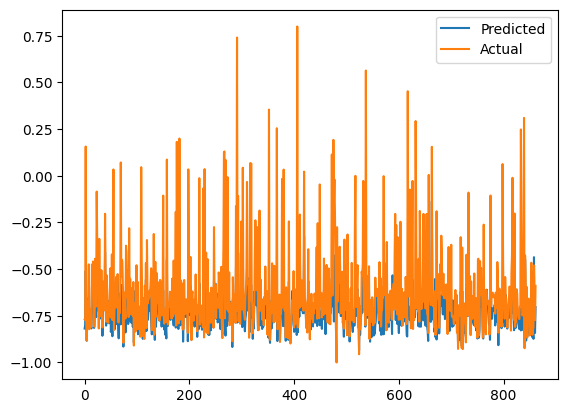

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, IterableDataset
import torch
from tqdm import tqdm
from Transformer.Encoder import Encoder
import torch.nn as nn
from fastkan import FastKAN as KAN
import torch.nn.functional as F



def load_data(filepath, category):
    data = pd.read_csv(filepath)
    if 'date' in data.columns:
        data.drop(['date'], axis=1, inplace=True)
    if 'Date' in data.columns:
        data.drop(['Date'], axis=1, inplace=True)
    if 'Adj Close' in data.columns:
        data.drop(['Adj Close'], axis=1, inplace=True)
    if 'Code' in data.columns:
        data.drop(['Code'], axis=1, inplace=True)
    if 'Time' in data.columns:
        data.drop(['Time'], axis=1, inplace=True)
    return data.dropna()

def scale_data(data):
    data = data.copy()
    # 进行不同的数据缩放，将数据缩放到-1和1之间
    scaler = MinMaxScaler(feature_range=(-1, 1))
    data = scaler.fit_transform(data)
    return data


def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length, :]
        label = data[i + seq_length, :]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


class TimeSeriesDataset(IterableDataset):
    def __init__(self, data, seq_length):
        self.data = data
        self.seq_length = seq_length

    def __iter__(self):
        for i in range(len(self.data) - self.seq_length):
            seq = self.data[i:i + self.seq_length]
            label = self.data[i + self.seq_length]
            yield torch.from_numpy(seq).float(), torch.from_numpy(label).float()


def get_train_test_data(data, lookback):
    # X, y = create_sequences(data, lookback)
    # X_train, X_test, y_train, y_test = train_test_split(
    #     X, y, test_size=0.1, shuffle=True, random_state=42)

    # train_dataset = TensorDataset(torch.from_numpy(
    #     X_train).float(), torch.from_numpy(y_train).float())
    # test_dataset = TensorDataset(torch.from_numpy(
    #     X_test).float(), torch.from_numpy(y_test).float())

    train_data,test_data=train_test_split(data,test_size=0.1,shuffle=True,random_state=42)
    train_dataset=TimeSeriesDataset(train_data,lookback)
    test_dataset=TimeSeriesDataset(test_data,lookback)
    train_dl = DataLoader(train_dataset, batch_size=128,
                          num_workers=8, pin_memory=True)
    test_dl = DataLoader(test_dataset, batch_size=128,
                         num_workers=8, pin_memory=True)

    # X_train = torch.from_numpy(X_train).float()
    # X_test = torch.from_numpy(X_test).float()
    # y_train = torch.from_numpy(y_train).float()
    # y_test = torch.from_numpy(y_test).float()

    return train_dl, test_dl


class Transformer(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, num_heads, dropout, kan=False):
        super(Transformer, self).__init__()

        # not using the nn transformer module
        # self.encoder_layer=nn.TransformerEncoderLayer(d_model=hidden_dim,nhead=num_heads,dropout=dropout,batch_first=True)
        # self.transformer_encoder=nn.TransformerEncoder(self.encoder_layer,num_layers=num_layers)
        # self.fc=nn.Linear(hidden_dim,output_dim)

        # using the using custom transformer module
        self.transformer_encoder = Encoder(d_model=hidden_dim,
                                           ffn_hidden=hidden_dim,
                                           n_head=num_heads,
                                           n_layers=num_layers,
                                           drop_prob=dropout,
                                           kan=kan)
        if kan:
            self.fc = KAN([hidden_dim, output_dim])
        else:
            self.fc = nn.Linear(hidden_dim, output_dim)

        self.input_dim = input_dim
        self.model_dim = hidden_dim
        self.embedding = nn.Linear(input_dim, hidden_dim)

    def forward(self, x):
        # x shape: (batch_size, seq_len, input_dim)
        x = self.embedding(x)*(self.model_dim**0.5)
        x = self.transformer_encoder(x)
        out = self.fc(x[:, -1, :])
        return out


def train_model_small(input_dim, hidden_dim, num_layers, output_dim, num_heads, dropout, X_train, y_train, kan=False):
    model = Transformer(input_dim=input_dim,
                        hidden_dim=hidden_dim,
                        num_layers=num_layers,
                        output_dim=output_dim,
                        num_heads=num_heads,
                        dropout=dropout,
                        kan=kan)
    model.to(device)
    criterion = torch.nn.MSELoss()
    optimiser = torch.optim.Adam(
        model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    # hist = np.zeros(num_epochs)
    # lstm = []
    lost_list = []

    for t in range(num_epochs):
        y_train_pred = model(X_train.to(device))

        loss = criterion(y_train_pred, y_train.to(device))
        # print("Epoch ", t, "MSE: ", loss.item())
        lost_list.append(loss.item())

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

    return model, loss.item()


def train_model_large(input_dim, hidden_dim, num_layers, output_dim, num_heads, dropout, train_dl, kan=False):
    model = Transformer(input_dim=input_dim,
                        hidden_dim=hidden_dim,
                        num_layers=num_layers,
                        output_dim=output_dim,
                        num_heads=num_heads,
                        dropout=dropout,
                        kan=kan)
    model.to(device)
    criterion = torch.nn.MSELoss()
    optimiser = torch.optim.Adam(
        model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    # hist = np.zeros(num_epochs)
    # lstm = []
    lost_list = []

    for e in range(num_epochs):
        print(f"Training the Epoch: {e + 1}")

        progress_bar = tqdm(
            train_dl, desc=f"Epoch {e+1}/{num_epochs}", dynamic_ncols=True)
        for batch in progress_bar:
            X_train, y_train = batch
            # print(f"X_train shape: {X_train.shape}. y_train shape: {y_train.shape}")
            X_train, y_train = X_train.to(device), y_train.to(device)
            y_pred = model(X_train)
            loss = criterion(y_pred, y_train)
            # print(f"y_pred shape: {y_pred.shape}. y_train shape: {y_train.shape}")
            loss.backward()

            optimiser.step()
            optimiser.zero_grad()
            progress_bar.set_postfix(loss=loss.item())
    return model, loss.item()


def test_model(model, test_dl, train_loss):
    loss_hist = []
    for batch in test_dl:
        X_test, y_test = batch
        loss = nn.MSELoss()
        # predict
        y_test_pred = model(X_test.to(device))
        # convert y_test to tensor
        y_test = y_test.to(device)
        loss_hist.append(loss(y_test_pred, y_test).item())
        print("shape of y_test_pred: ", y_test_pred.shape)
        plt.plot(y_test_pred.detach().cpu().numpy()[0], label='Predicted')
        plt.plot(y_test.detach().cpu().numpy()[0], label='Actual')
        plt.legend()
        break
    # calculate MSE
    print(f"Train loss:{train_loss}\nTest loss: {np.mean(loss_hist)}")
    return np.mean(loss_hist)


if __name__ == '__main__':
    base_dir="/mnt/c/WorkDir/ComputerScience/MachineLearning/EE/src"
    # file_path = '../data/iTransformer_datasets/electricity/electricity.csv'
    # file_path = '~/Documents/ML/EE/data/iTransformer_datasets/traffic/traffic.csv'
    # file_path = '~/Documents/ML/EE/data/iTransformer_datasets/weather/weather.csv'
    # file_path = base_dir+"/data/iTransformer_datasets/exchange_rate/exchange_rate.csv"
    # file_path = '~/Documents/ML/EE/data/stock-data/AMD.csv'
    base_dir="/mnt/c/WorkDir/ComputerScience/MachineLearning/EE/src"
    file_path = base_dir+"/data/iTransformer_datasets/traffic/traffic.csv"
    data = load_data(file_path, category="traffic")
    scaled_data = scale_data(data)

    # lookback = [16,32,64,128,256,512]
    lookback = [32]
    train_loss_log=[]
    test_loss_log=[]
    for i in lookback:
        # X_train, X_test, y_train, y_test = get_train_test_data(
        #     scaled_data, lookback)
        train_dl, test_dl = get_train_test_data(scaled_data, i)
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # 输入的维度为1，只有Close收盘价
        input_dim = scaled_data.shape[1]
        # 隐藏层特征的维度
        hidden_dim = 8
        # 循环的layers
        num_layers = 2
        # 预测后一天的收盘价
        output_dim = scaled_data.shape[1]
        num_epochs = 1
        learning_rate = 0.001
        weight_decay = 1e-4
        num_heads = 2
        dropout = 0.1

        # Withou KAN
        # model1, train_loss1 = train_model_small(input_dim, hidden_dim, num_layers,
        #                                         output_dim, num_heads, dropout,X_train,y_train kan=False)
        model1, train_loss1 = train_model_large(input_dim, hidden_dim, num_layers,
                                                output_dim, num_heads, dropout, train_dl, kan=False)
        train_loss_log.append(train_loss1)
        print("Without KAN:")
        # test_model(model1, X_test, y_test, train_loss1)
        test_loss_1=test_model(model1, test_dl, train_loss1)
        test_loss_log.append(test_loss_1)
    # np.save(base_dir+"/experiments/loss-data/traffic/transformer_train_loss_log.npy",train_loss_log)
    # np.save(base_dir+"/experiments/loss-data/traffic/transformer_test_loss_log.npy",test_loss_log)

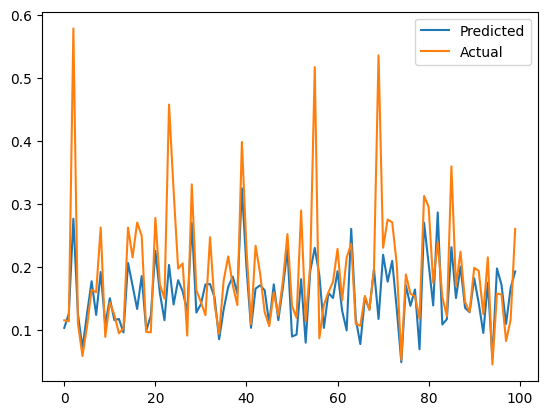

In [10]:
plt.plot(y_test_pred[0][0][:100], label="Predicted")
plt.plot(y_test[0][0][:100], label="Actual")
plt.legend()

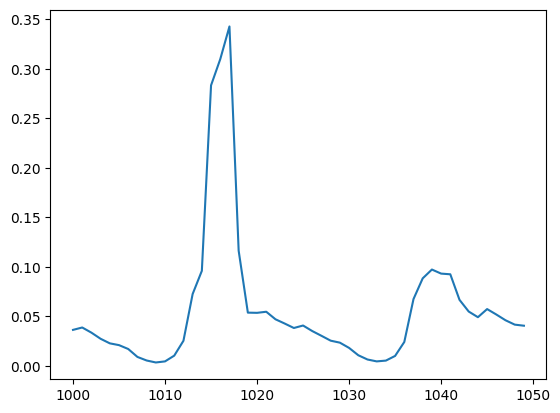

In [26]:
plt.plot(traffic_df['1'][1000:1050])

In [31]:
# read from npy file
base_dir="/mnt/c/WorkDir/ComputerScience/MachineLearning/EE/model-train/loss-data/weather"

df=pd.DataFrame()
# iterate the directory and read npy file
for filename in os.listdir(base_dir):
    if filename.endswith(".npy"):
        if not filename.__contains__("train"):
            filepath=os.path.join(base_dir, filename)
            data=np.load(filepath)
            df[f"{filename}"]=data
        
        
df['sequence_length']=np.array([16,32,64,128,256,512])

for column in df.columns:
    if column != "sequence_length":
        plt.plot(df['sequence_length'], df[column], label=column)

plt.legend()

plt.title('Loss Comparison')
plt.xlabel('Sequence length')
plt.ylabel('Loss')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/WorkDir/ComputerScience/MachineLearning/EE/model-train/loss-data/weather'

In [55]:
df

,TCformer1d.npy,transformer.npy,sequence_length
0,0.026144,0.104435,16
1,0.026144,0.104253,32
2,0.026188,0.103928,64
3,0.025542,0.101652,128
4,0.028019,0.107837,256
5,0.026371,0.104923,512


In [56]:
df['pct_improve'] = ((df['TCformer1d.npy'] / df['transformer.npy']) * 100).round(2)

In [57]:
df

,TCformer1d.npy,transformer.npy,sequence_length,pct_improve
0,0.026144,0.104435,16,25.03
1,0.026144,0.104253,32,25.08
2,0.026188,0.103928,64,25.20
3,0.025542,0.101652,128,25.13
4,0.028019,0.107837,256,25.98
5,0.026371,0.104923,512,25.13


In [58]:
df.to_latex(index=False)

/tmp/ipykernel_2484378/3912603319.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex(index=False)


'\\begin{tabular}{rrrr}\n\\toprule\n TCformer1d.npy &  transformer.npy &  sequence\\_length &  pct\\_improve \\\\\n\\midrule\n       0.026144 &         0.104435 &               16 &        25.03 \\\\\n       0.026144 &         0.104253 &               32 &        25.08 \\\\\n       0.026188 &         0.103928 &               64 &        25.20 \\\\\n       0.025542 &         0.101652 &              128 &        25.13 \\\\\n       0.028019 &         0.107837 &              256 &        25.98 \\\\\n       0.026371 &         0.104923 &              512 &        25.13 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [34]:
pd.read_csv("../data/iTransformer_datasets/traffic/traffic.csv")

,date,0,1,2,3,4,5,6,7,8,...,852,853,854,855,856,857,858,859,860,OT
0,2016-07-01 02:00:00,0.0048,0.0146,0.0289,0.0142,0.0064,0.0232,0.0162,0.0242,0.0341,...,0.0051,0.0051,0.0074,0.0079,0.0051,0.0051,0.0339,0.0051,0.0100,0.0121
1,2016-07-01 03:00:00,0.0072,0.0148,0.0350,0.0174,0.0084,0.0240,0.0201,0.0338,0.0434,...,0.0036,0.0036,0.0107,0.0058,0.0036,0.0036,0.0348,0.0036,0.0087,0.0136
2,2016-07-01 04:00:00,0.0040,0.0101,0.0267,0.0124,0.0049,0.0170,0.0127,0.0255,0.0332,...,0.0030,0.0030,0.0043,0.0050,0.0030,0.0030,0.0327,0.0030,0.0061,0.0107
3,2016-07-01 05:00:00,0.0039,0.0060,0.0218,0.0090,0.0029,0.0118,0.0088,0.0163,0.0211,...,0.0033,0.0033,0.0019,0.0052,0.0033,0.0033,0.0292,0.0033,0.0040,0.0071
4,2016-07-01 06:00:00,0.0042,0.0055,0.0191,0.0082,0.0024,0.0095,0.0064,0.0087,0.0144,...,0.0049,0.0049,0.0011,0.0071,0.0049,0.0049,0.0264,0.0049,0.0040,0.0039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,0.0342,0.0332,0.1378,0.0559,0.0165,0.0386,0.0457,0.0687,0.0716,...,0.0139,0.0179,0.0278,0.0280,0.0227,0.0375,0.0142,0.0201,0.0341,0.0429
17540,2018-07-01 22:00:00,0.0285,0.0253,0.0542,0.0485,0.0131,0.0331,0.0372,0.0569,0.0669,...,0.0116,0.0155,0.0201,0.0267,0.0207,0.0320,0.0122,0.0163,0.0306,0.0363
17541,2018-07-01 23:00:00,0.0276,0.0257,0.0551,0.0474,0.0121,0.0326,0.0381,0.0566,0.0675,...,0.0109,0.0142,0.0208,0.0252,0.0189,0.0287,0.0123,0.0152,0.0292,0.0325
17542,2018-07-02 00:00:00,0.0232,0.0229,0.0496,0.0435,0.0119,0.0297,0.0361,0.0517,0.0598,...,0.0092,0.0124,0.0219,0.0215,0.0169,0.0258,0.0096,0.0130,0.0252,0.0279
